# Titanic.ipynb

In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

In [117]:
file_path = 'E:/AI/week2/dataFrame/titanic.csv'
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터의 정보를 확인

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [119]:
df.shape

(891, 12)

In [120]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [121]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

### 범주형 열과 숫자형 열을 확인

In [122]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)


Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


### 범주형 열의 고유 값의 총 개수를 확인

In [123]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

### 숫자형 열의 고유 값의 총 개수를 확인

In [124]:
df[num_col].nunique()

PassengerId    891
Survived         2
Pclass           3
Age             88
SibSp            7
Parch            7
Fare           248
dtype: int64

### 위의 모든 불필요한 관찰 사항 제거

In [125]:
df['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [126]:
df_cleaned = df.drop(columns=['Name', 'Ticket', 'PassengerId'])
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [127]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [128]:
df_cleaned.shape

(891, 9)

### 결측치 확인

In [129]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [130]:
df_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [131]:
round((df_cleaned.isnull().sum()/df_cleaned.shape[0])*100,2)

Survived     0.00
Pclass       0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

### # 누락된 데이터 처리


In [132]:
df_cleaned_ver2 = df_cleaned.drop(columns=['Cabin'])
df_cleaned_ver2.dropna(subset=['Embarked'], axis=0, inplace=True)
df_cleaned_ver2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [133]:
df_cleaned_ver2.shape

(889, 8)

In [134]:
#Mean imputation
df_cleaned_ver3 = df_cleaned_ver2.fillna(df_cleaned_ver2.Age.mean())
df_cleaned_ver3.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [135]:
df_cleaned_ver3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [136]:
# import matplotlib.pyplot as plt

# plt.boxplot(df_cleaned_ver3.Age)
# plt.show()

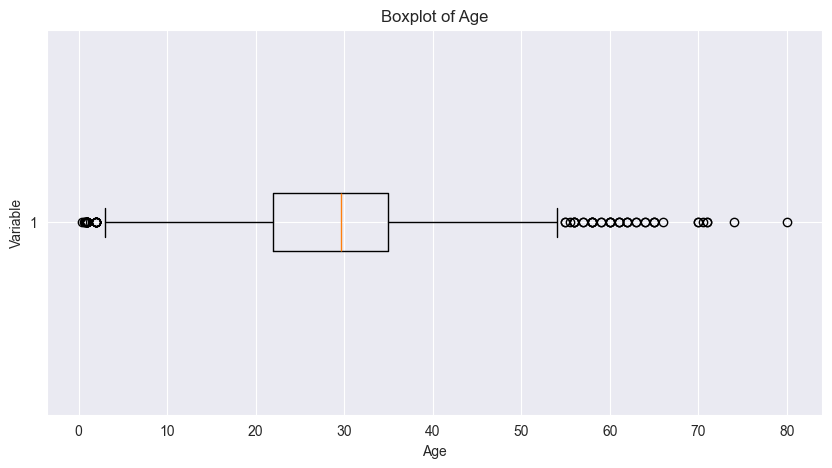

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.boxplot(df_cleaned_ver3['Age'], vert=False)
plt.ylabel("Variable")
plt.xlabel("Age")
plt.title("Boxplot of Age")
plt.show()

#### 위의 상자와 수염 그림에서 볼 수 있듯이, 우리의 연령 데이터 세트에는 이상치 값이 ​​있습니다. 5보다 작고 55보다 큰 값은 이상치

In [138]:
# 요약 통계
mean = df_cleaned_ver3['Age'].mean()
std = df_cleaned_ver3['Age'].std()
# 하한과 상한 노력
lower_bound = mean - 2*std
upper_bound = mean + 2*std

print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

# 이상치 제거
df_cleaned_ver4 = df_cleaned_ver3[(df_cleaned_ver3['Age'] > lower_bound) & (df_cleaned_ver3['Age'] < upper_bound)]

Lower Bound:  3.7054001079256587
Upper Bound:  55.57878528533277


In [139]:
df_cleaned_ver4.shape

(821, 8)

In [140]:
df_cleaned_ver4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 821 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  821 non-null    int64  
 1   Pclass    821 non-null    int64  
 2   Sex       821 non-null    object 
 3   Age       821 non-null    float64
 4   SibSp     821 non-null    int64  
 5   Parch     821 non-null    int64  
 6   Fare      821 non-null    float64
 7   Embarked  821 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 57.7+ KB


In [141]:
df_cleaned_ver4.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [142]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encodeColumn = ['Sex', 'Embarked']
for col in encodeColumn:
    df_cleaned_ver4.loc[:, col] = label_encoder.fit_transform(df_cleaned_ver4[col])

df_cleaned_ver4

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.642093,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


## 데이터 분할

In [143]:
X = df_cleaned_ver4.drop('Survived', axis=1)
y = df_cleaned_ver4['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((656, 7), (165, 7), (656,), (165,))

## 데이터 정규화

In [144]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5]

array([[-1.58323751,  0.7545714 ,  2.2053942 ,  0.40569   ,  0.74253037,
         1.0336956 ,  0.58592747],
       [ 0.81261902, -1.32525564,  0.09872692, -0.46402451, -0.45134199,
        -0.51538913, -0.68681564],
       [-1.58323751,  0.7545714 ,  0.83361085, -0.46402451, -0.45134199,
        -0.6823628 ,  0.58592747],
       [-0.38530924, -1.32525564,  0.34368823,  0.40569   ,  1.93640273,
        -0.08448935,  0.58592747],
       [ 0.81261902, -1.32525564,  0.14771918,  0.40569   ,  0.74253037,
        -0.24015189,  0.58592747]])

### # Decision Tree (DT) 분류

In [155]:
def line():
    print("--"*50)

dt_model = DecisionTreeClassifier(random_state=42)  # 모델을 초기화하고, 랜덤 시드를 42로 설정
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}\n")
print("y_test: ", y_test.values)
line()
print("y_pred_dt: ", y_pred_dt)
line()
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7333

y_test:  [0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0
 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1]
----------------------------------------------------------------------------------------------------
y_pred_dt:  [1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1]
----------------------------------------------------------------------------------------------------
Confusion Matrix: 
 [[84 18]
 [26 37]]


### # Random Forest (RF) 분류

In [148]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}\n")
print("y_test: ", y_test.values)
line()
print("y_pred_rf: ", y_pred_rf)

Random Forest Accuracy: 0.7879

y_test:  [0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0
 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1]
----------------------------------------------------------------------------------------------------
y_pred_rf:  [0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1]


### # Logistic Regression (LR) 분류

In [156]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}\n")
print("y_test: ", y_test.values)
line()
print("y_pred_lr: ", y_pred_lr)
line()
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8121

y_test:  [0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0
 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1]
----------------------------------------------------------------------------------------------------
y_pred_lr:  [0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1]
----------------------------------------------------------------------------------------------------
Confusion Matrix: 
 [[92 10]
 [21 42]]


### # Support Vector Machine (SVM) 분류

In [157]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}\n")
print("y_test: ", y_test.values)
line()
print("y_pred_svm: ", y_pred_svm)
line()
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.7879

y_test:  [0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0
 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1]
----------------------------------------------------------------------------------------------------
y_pred_svm:  [0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0
 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1]
----------------------------------------------------------------------------------------------------
Confusion Matrix: 
 [[96  6]
 [29 34]]


### # K-Nearest Neighbors (KNN) 분류

In [159]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}\n")
print("y_test: ", y_test.values)
line()
print("y_pred_knn: ", y_pred_knn)
line()
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.7818

y_test:  [0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0
 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1]
----------------------------------------------------------------------------------------------------
y_pred_knn:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0
 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1]
----------------------------------------------------------------------------------------------------
Confusion Matrix: 
 [[92 10]
 [26 37]]
